## 第一期 关联图：03最佳拟合线 ，04带状图 ，05计数图

## o新知识点

1.gridobj =sns.lmplot(……,legend=False   #点)  gridobj.set()

2.plt.legend(["类别0","类别1"])  #线

3.[*zip(df.columns.values,np.array(name))]

4.df.loc[df.cyl.isin([4,8]),:].head()  #为4和为8

5.df.cyl.value_counts()

6.sns.stripplot( , jitter=0.25 #抖动的幅度，不能太多不能太小)

7.df_counts = df.groupby(['hwy', 'cty']).size().reset_index(name="counts") 


<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

### 03/50 带最佳拟合线的散点图(the line of best fit)

最佳拟合线（或“趋势”线）是一条直线，它被认为是最能代表散点图上的数据的直线  
这条线线可以通过一些散点，不通过任何散点或通过所有散点  
**拟合线可以帮助我们找出并不太明显的趋势**

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/03%20%E6%8B%9F%E5%90%88%E7%BA%BF%E7%9A%84%E6%95%A3%E7%82%B9%E5%9B%BE2.PNG" align="center" />

横坐标：发动机排量(L)<br>
总坐标：公路里程/加仑<br>
图例：汽缸数量

### 1. 导入需要的绘图库

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2. 先来认识一下绘制最佳拟合线的函数

#### **sns.lmplot()**  
lmplot()是seaborn中最常用的函数之一，我们用它来帮助我们绘制出数据点的最佳拟合线。

In [3]:
X1 = np.linspace(0,10,50)  #主要用来创建等差数列
X2 = [0]*10 + [1]*40  # 前10个为0
y = 2*X1 + 5 + np.random.randn(50)*10

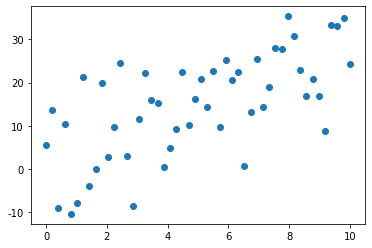

In [4]:
plt.scatter(X1,y);

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


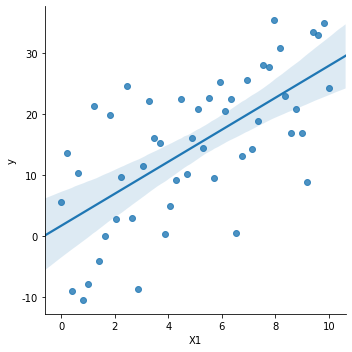

In [5]:
data = pd.DataFrame({"X1":X1,"X2":X2,"y":y})
gridobj = sns.lmplot("X1","y",data=data) #sns需要用DataFrame再用标签取出必须通过

事实上，sns.lmplot()功能复杂，参数丰富（39个），我们可以通过它创造一个在数据集的不同子集上拟合回归模型的便捷界面，对于有众多分类特征的回归类数据非常有效。

In [6]:
#比如说，如果我们要将点分类？

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


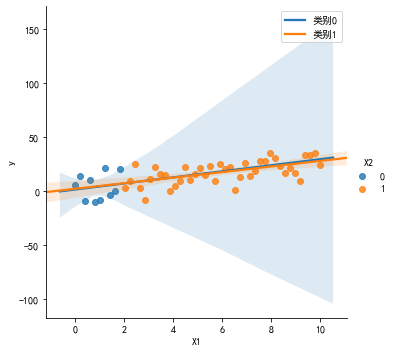

In [7]:
plt.rcParams['font.sans-serif']=['Simhei']
data = pd.DataFrame({"X1":X1,"X2":X2,"y":y})
gridobj = sns.lmplot("X1","y",data=data
                    ,hue = "X2" #huge分类型变量
                 #   ,legend=False   #点
                    )
plt.legend(["类别0","类别1"])  #线

> **重要参数**  
>> x ,y ,data：横坐标，纵坐标，数据  
>> hue：取出数据集的子集，对数据集进行分类  
>> legend：是否显示图例<br>

更多参数请见：https://seaborn.pydata.org/generated/seaborn.lmplot.html

### 3. 认识数据

In [8]:
df = pd.read_csv("data/mpg_ggplot2.csv")

In [9]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [10]:
df.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

In [17]:
name = ["汽车制造商","型号名称","发动机排量(L)","制造年份","气缸数量","手动/自动"
              ,"驱动类型","城市里程/加仑","公路里程/加仑","汽油种类","车辆种类"]

#驱动类型：四轮，前轮，后轮
#能源种类：汽油，柴油，用电等等
#车辆种类：皮卡，SUV，小型，中型等等
#城市里程/加仑，公路里程/加仑：表示使用没加仑汽油能够跑的英里数，所以这个数值越大代表汽车越节能

In [32]:
[*zip(df.columns.values,np.array(name))]

[('manufacturer', '汽车制造商'),
 ('model', '型号名称'),
 ('displ', '发动机排量(L)'),
 ('year', '制造年份'),
 ('cyl', '气缸数量'),
 ('trans', '手动/自动'),
 ('drv', '驱动类型'),
 ('cty', '城市里程/加仑'),
 ('hwy', '公路里程/加仑'),
 ('fl', '汽油种类'),
 ('class', '车辆种类')]

### 4. 绘制图像

In [11]:
df.loc[df.cyl.isin([4,8]),:].head()  #为4和为8
#函数isin的用法：a.isin(x)，表示判断x是否在序列a中存在，若存在则返回True，若不存在则返回False

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact


In [12]:
df.cyl.value_counts()

4    81
6    79
8    70
5     4
Name: cyl, dtype: int64

In [13]:
df.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

> **重要参数**  
>> height：图像的高度  
>> aspect：图像的纵横比，aspect * height = 每张图的长度  
>> palette：类似于matplotlib中的colormap，表示使用什么色板/光谱

## 成品

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


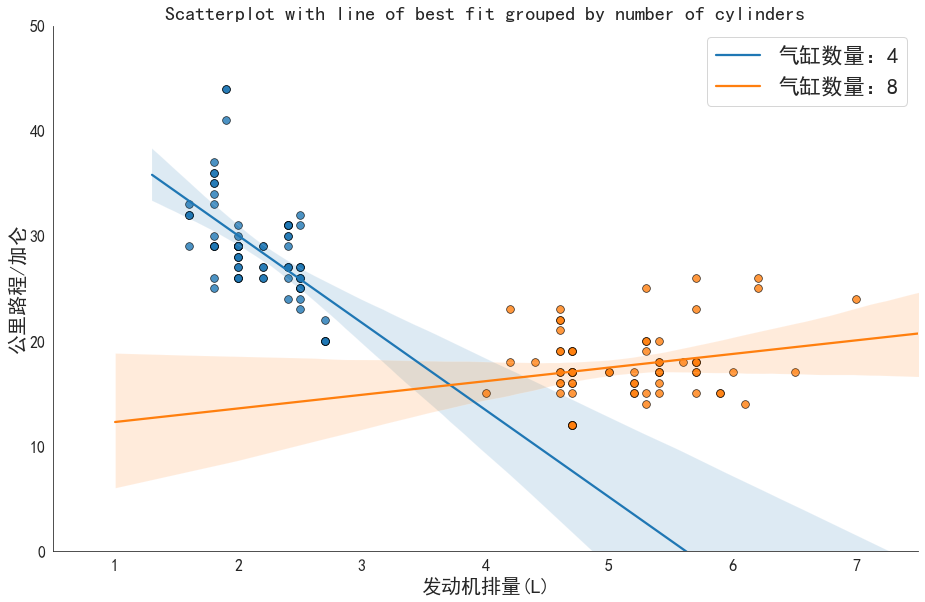

In [16]:
#准备数据
df_select = df.loc[df.cyl.isin([4,8]), :]   # 只要4和8的行

#绘制图像
sns.set_style("white") #设立风格

gridobj = sns.lmplot(x="displ" #横坐标：发动机排量
                     , y="hwy" #纵坐标：公路里程/加仑
                     , hue="cyl" #分类/子集，汽缸数量
                     , data=df_select #能够输入的数据，筛选
                     , height=8 #图像的高度（纵向，也叫做宽度）
                     , aspect=1.6 #图像的纵横比，因此 aspect*height = 每个图像的长度（横向），单位为英寸
                     , palette='tab10' #色板，tab10
                     , legend = False #不显示图例
                     , scatter_kws=dict(s=60, linewidths=.7, edgecolors='black') #其他参数
                    )

#装饰图像
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.rcParams['font.sans-serif']=['Simhei']  #显示中文
plt.xlabel("发动机排量(L)",fontsize=20)
plt.ylabel("公里路程/加仑",fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(["气缸数量：4","气缸数量：8"], fontsize=22)
plt.title("Scatterplot with line of best fit grouped by number of cylinders", fontsize=20)
plt.show()

### 5. 让每个类型的散点显示在不同的图像上

> **重要参数**
>> col：表示按照这个特征中的分类绘制图像，并且一个类别绘制一张图一条拟合线，排成一行  
>> col_wrap：当参数col有效的时候有效，表示每行最多显示col_wrap个图

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


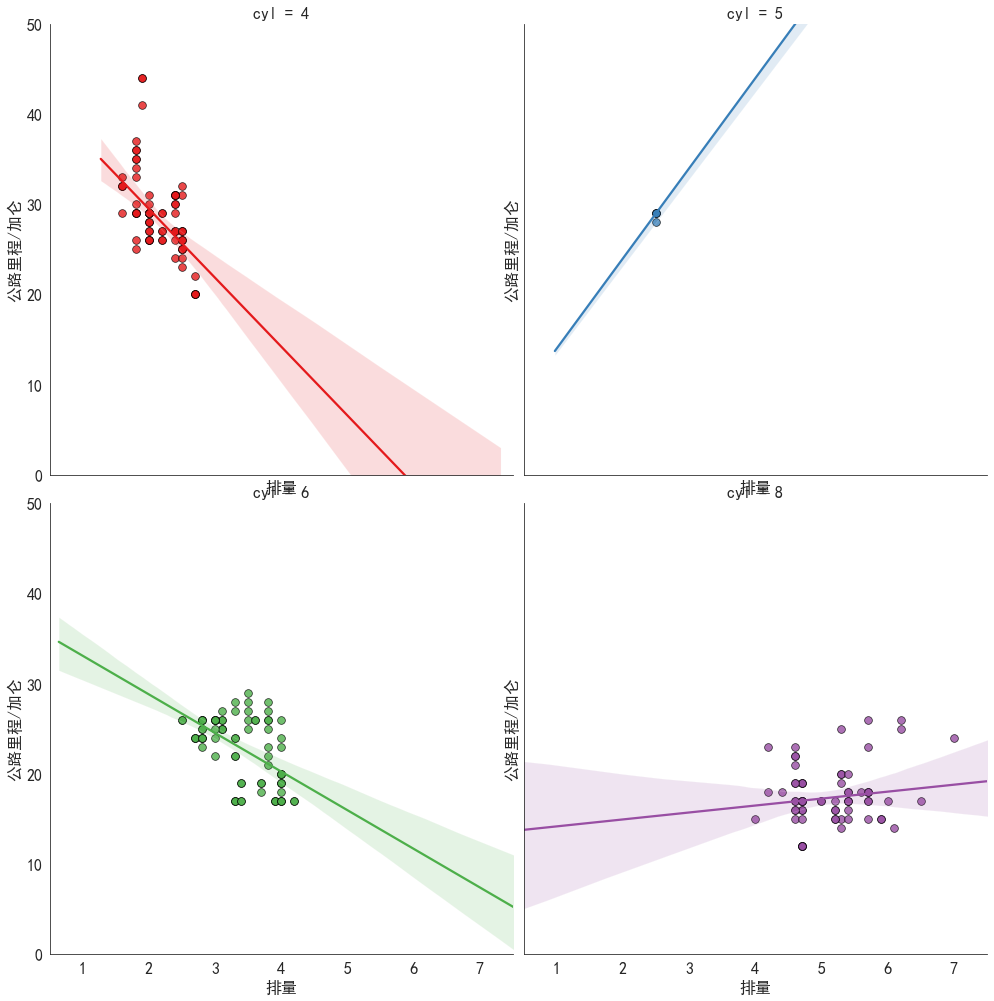

In [20]:
large = 22; med = 16; small = 12
params = {'axes.titlesize': large, #子图上的标题字体大小
          'legend.fontsize': med, #图例的字体大小
          'figure.figsize': (16, 10), #图像的画布大小
          'axes.labelsize': med, #标签的字体大小
          'xtick.labelsize': med, #x轴上的标尺的字体大小
          'ytick.labelsize': med, #y轴上的标尺的字体大小
          'figure.titlesize': large} #整个画布的标题字体大小
plt.rcParams.update(params) #设定各种各样的默认属性

gridobj = sns.lmplot(x="displ", y="hwy", 
                     #data=df_select, 
                     data=df, #4条线，运行久
                     hue = "cyl",
                     height=7, 
                     robust=True, 
                     palette='Set1', 
                     col="cyl", #表示按照这个特征中的分类绘制图像，并且一个类别使用一张图，一条直线
                     col_wrap = 2, #表示对col中的类别数量进行折叠，让一行变成多行，最多一行2个
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black')
                    )

#装饰图像
plt.rcParams['font.sans-serif']=['Simhei']
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50),xlabel="排量",ylabel="公路里程/加仑")
plt.show()

### 6. 可以从图像解读出什么信息？
**公里数越大越节能，气缸数量小时，发动机排量小，节能；<br>气缸数量排量越大越省**

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

### 04 & 05/50 抖动的带状图与计数图————有重复数据

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/04%2B05.PNG" align="center" />

In [24]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
# Import Data
df = pd.read_csv("data/mpg_ggplot2.csv")

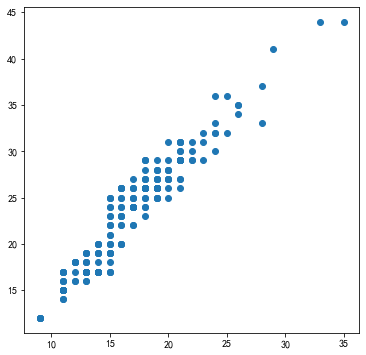

In [26]:
plt.figure(figsize=(6,6))
plt.scatter(df.cty,df.hwy);  # 城市里程和公里里程

In [27]:
#你是否有发现，图像上的数据点看起来似乎有点少？有重复

In [28]:
df.shape

(234, 11)

In [29]:
df.loc[:,["cty","hwy"]] #发现了么？有很多横纵坐标一致的点~

,cty,hwy
0,18,29
1,21,29
2,20,31
3,21,30
4,16,26
5,18,26
6,18,27
7,18,26
8,16,25
9,20,28


有两种手段可以解决这个问题，抖动图与计数图，两种都使用我们的类stripplot来进行绘制

#### sns.stripplot()  显示重复点
>重要参数  
>> jitter：抖动的幅度（即同一位置的两个点的距离大小），0表示完全不存在抖动

#### 抖动图

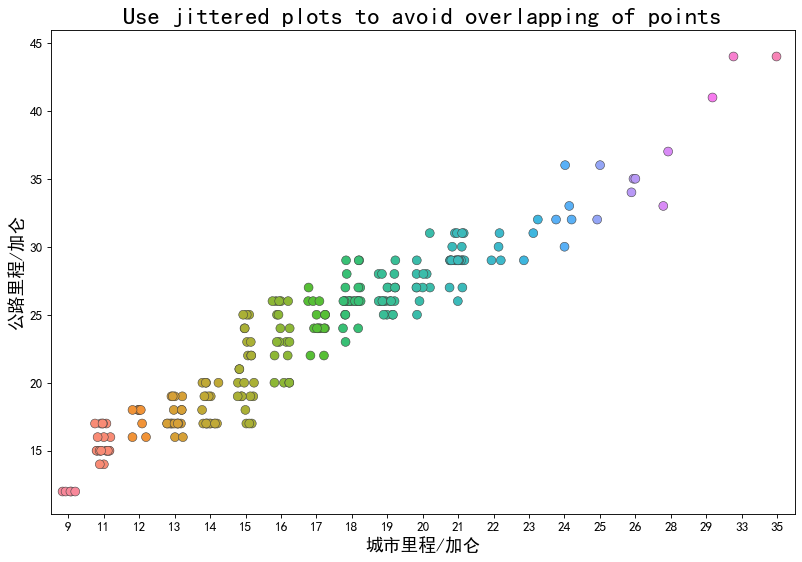

In [30]:
#建立画布
fig, ax = plt.subplots(figsize=(12,8), dpi = 80)

#用来画抖动图的函数：sns.stripplot ，自带颜色
sns.stripplot(df.cty, df.hwy
              , jitter=0.25 #抖动的幅度，不能太多不能太小
              , size=8, ax=ax  #是否有子图
              , linewidth=.5
              #, palette='tab10'
             )

# Decorations
plt.title('Use jittered plots to avoid overlapping of points', fontsize=22)
plt.rcParams['font.sans-serif']=['Simhei']
plt.xlabel("城市里程/加仑",fontsize=16)
plt.ylabel("公路里程/加仑",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### 计数图 —— 面积越大越多

In [31]:
#处理数据
df_counts = df.groupby(['hwy', 'cty']).size().reset_index(name="counts") 
# name参数：用于原始Series里面本来是value的那些值的列名-计算
# reset_index重排索引

## 核心

In [32]:
df.groupby(['hwy', 'cty']).size() #以hwy和cty为主键，取出来的所有类别，size是聚合函数表示，点个数    ————数据透视
# 计算结果为value，类型为series

hwy  cty
12   9       5
14   11      2
15   11     10
16   11      3
     12      2
     13      2
17   11      5
     12      1
     13     12
     14     10
     15      3
18   12      5
     13      3
     14      1
     15      1
19   13      4
     14      4
     15      5
20   14      4
     15      3
     16      4
21   15      2
22   15      3
     16      2
     17      2
23   15      2
     16      4
     18      1
24   15      2
     16      2
            ..
27   21      2
28   18      1
     19      3
     20      3
29   18      3
     19      1
     20      1
     21     14
     22      2
     23      1
30   21      2
     22      1
     24      1
31   20      1
     21      4
     22      1
     23      1
32   23      1
     24      2
     25      1
33   24      1
     28      1
34   26      1
35   26      2
36   24      1
     25      1
37   28      1
41   29      1
44   33      1
     35      1
Length: 78, dtype: int64

In [33]:
#size与count有什么不同？
df.groupby(['hwy', 'cty']).count()

manufacturer  model  displ  year  cyl  trans  drv  fl  class
hwy cty                                                              
12  9               5      5      5     5    5      5    5   5      5
14  11              2      2      2     2    2      2    2   2      2
15  11             10     10     10    10   10     10   10  10     10
16  11              3      3      3     3    3      3    3   3      3
    12              2      2      2     2    2      2    2   2      2
    13              2      2      2     2    2      2    2   2      2
17  11              5      5      5     5    5      5    5   5      5
    12              1      1      1     1    1      1    1   1      1
    13             12     12     12    12   12     12   12  12     12
    14             10     10     10    10   10     10   10  10     10
    15              3      3      3     3    3      3    3   3      3
18  12              5      5      5     5    5      5    5   5      5
    13              3      3      3     3    3      3    3   3      3
    14              1      1      1     1    1      1    1   1      1
    15              1      1      1     1    1      1    1   1      1
19  13              4      4      4     4    4      4    4   4      4
    14              4      4      4     4    4      4    4   4      4
    15              5      5      5     5    5      5    5   5      5
20  14              4      4      4     4    4      4    4   4      4
    15              3      3      3     3    3      3    3   3      3
    16              4      4      4     4    4      4    4   4      4
21  15              2      2      2     2    2      2    2   2      2
22  15              3      3      3     3    3      3    3   3      3
    16              2      2      2     2    2      2    2   2      2
    17              2      2      2     2    2      2    2   2      2
23  15              2      2      2     2    2      2    2   2      2
    16              4      4      4     4    4      4    4   4      4
    18              1      1      1     1    1      1    1   1      1
24  15              2      2      2     2    2      2    2   2      2
    16              2      2      2     2    2      2    2   2      2
...               ...    ...    ...   ...  ...    ...  ...  ..    ...
27  21              2      2      2     2    2      2    2   2      2
28  18              1      1      1     1    1      1    1   1      1
    19              3      3      3     3    3      3    3   3      3
    20              3      3      3     3    3      3    3   3      3
29  18              3      3      3     3    3      3    3   3      3
    19              1      1      1     1    1      1    1   1      1
    20              1      1      1     1    1      1    1   1      1
    21             14     14     14    14   14     14   14  14     14
    22              2      2      2     2    2      2    2   2      2
    23              1      1      1     1    1      1    1   1      1
30  21              2      2      2     2    2      2    2   2      2
    22              1      1      1     1    1      1    1   1      1
    24              1      1      1     1    1      1    1   1      1
31  20              1      1      1     1    1      1    1   1      1
    21              4      4      4     4    4      4    4   4      4
    22              1      1      1     1    1      1    1   1      1
    23              1      1      1     1    1      1    1   1      1
32  23              1      1      1     1    1      1    1   1      1
    24              2      2      2     2    2      2    2   2      2
    25              1      1      1     1    1      1    1   1      1
33  24              1      1      1     1    1      1    1   1      1
    28              1      1      1     1    1      1    1   1      1
34  26              1      1      1     1    1      1    1   1      1
35  26              2      2      2     2    2      2    2   2      2
36  24             

In [34]:
df_counts

,hwy,cty,counts
0,12,9,5
1,14,11,2
2,15,11,10
3,16,11,3
4,16,12,2
5,16,13,2
6,17,11,5
7,17,12,1
8,17,13,12
9,17,14,10


In [35]:
[*zip(df.columns.values,np.array(name))]

[('manufacturer', '汽车制造商'),
 ('model', '型号名称'),
 ('displ', '发动机排量(L)'),
 ('year', '制造年份'),
 ('cyl', '气缸数量'),
 ('trans', '手动/自动'),
 ('drv', '驱动类型'),
 ('cty', '城市里程/加仑'),
 ('hwy', '公路里程/加仑'),
 ('fl', '汽油种类'),
 ('class', '车辆种类')]

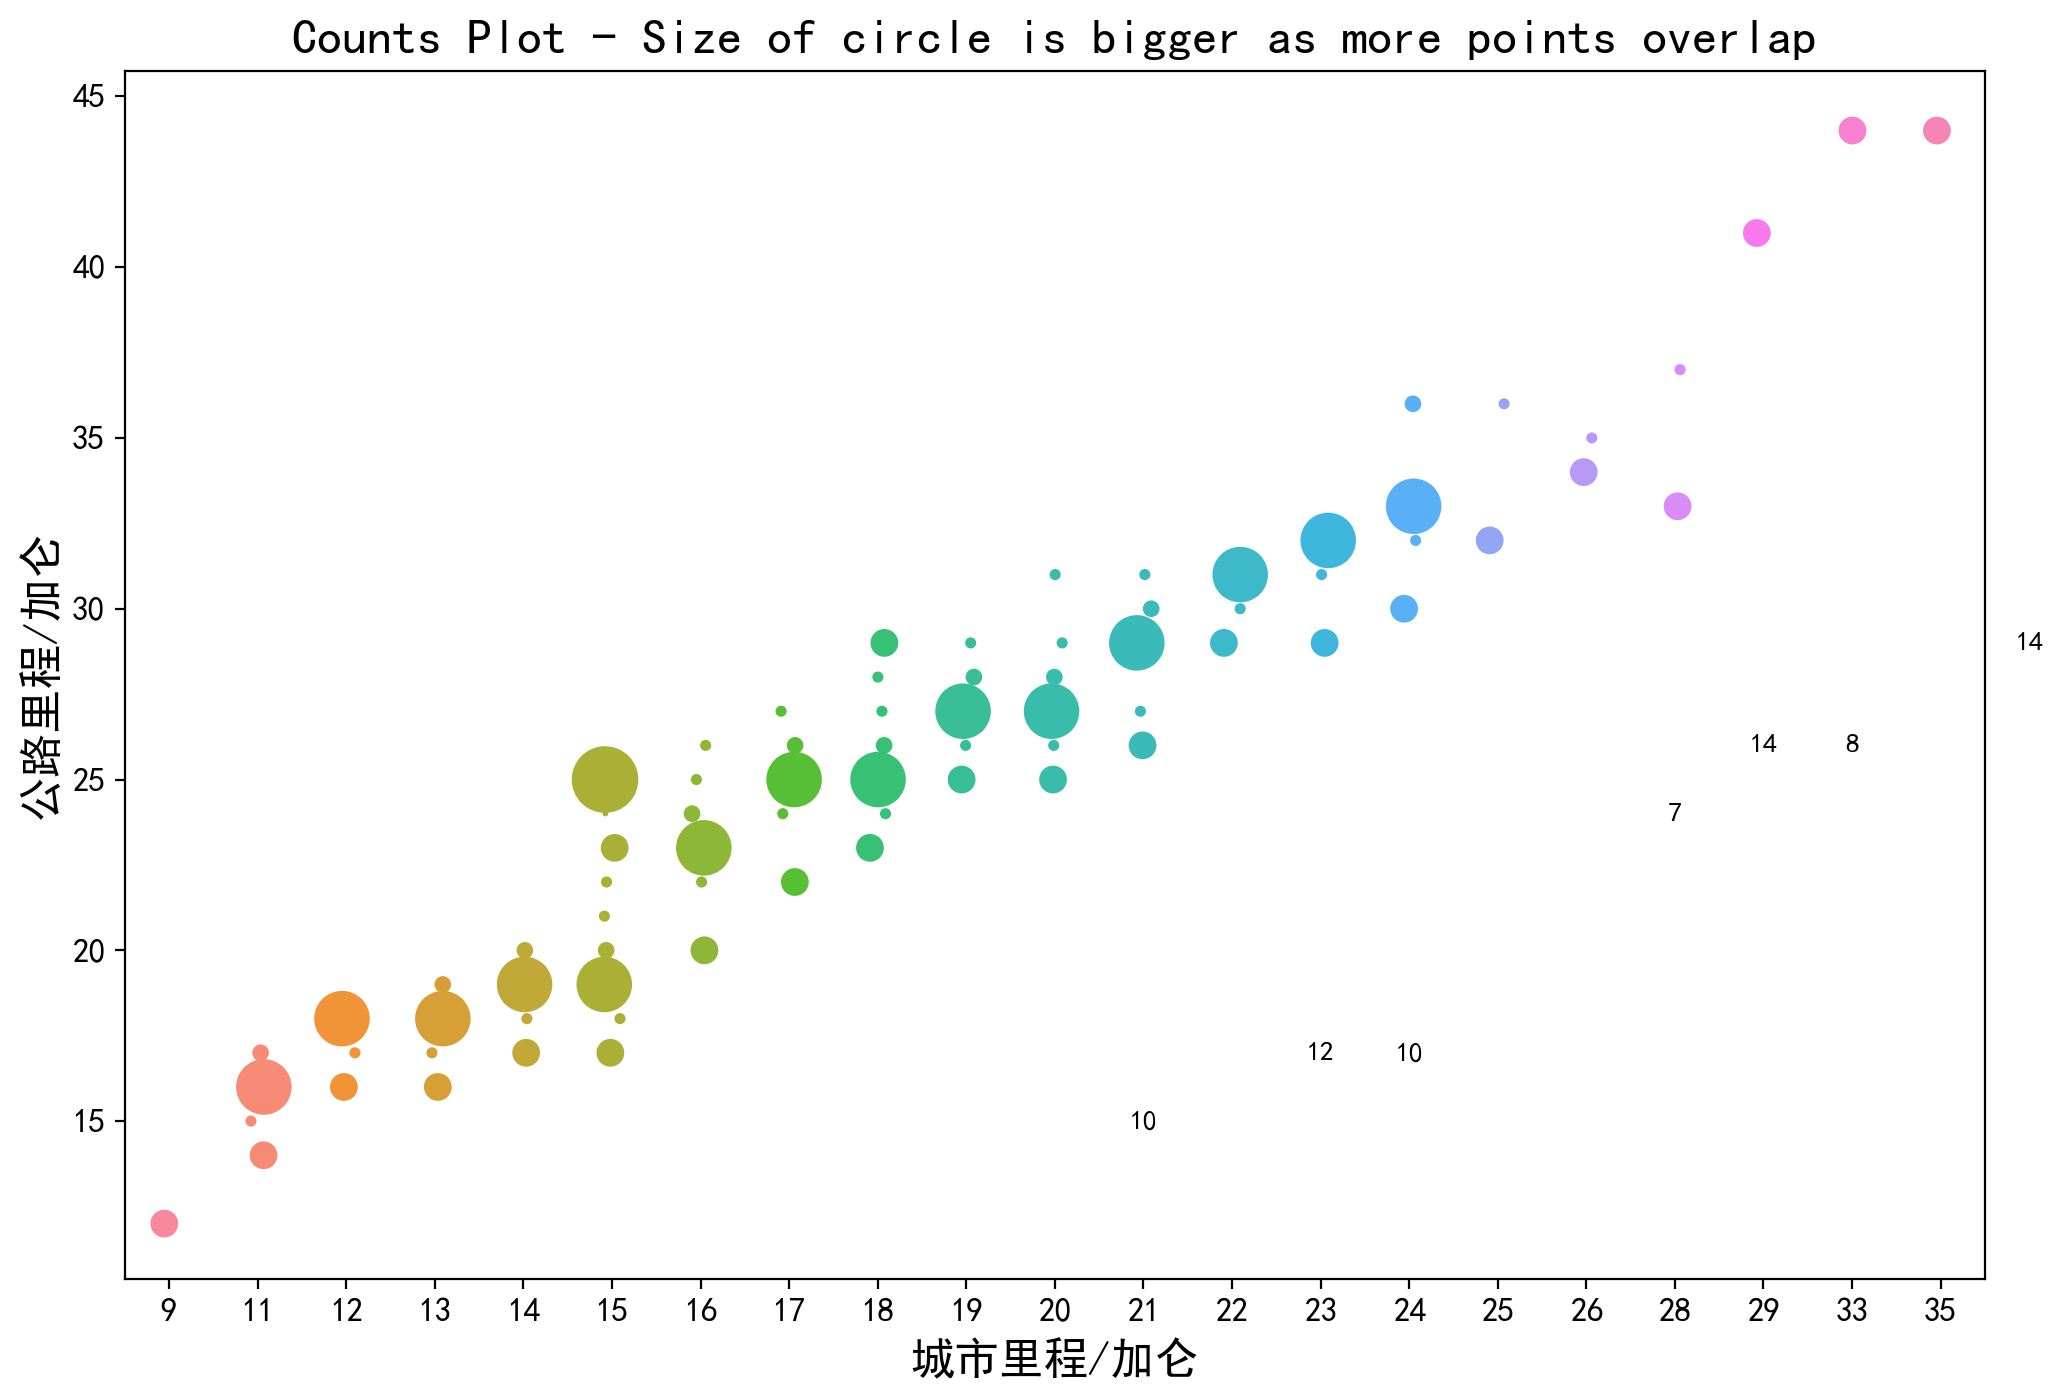

In [37]:
#画计数图
fig, ax = plt.subplots(figsize=(12,8), dpi= 200)    

sns.stripplot(df_counts.cty #横坐标
              , df_counts.hwy #纵坐标
              , s=df_counts.counts*2 #尺寸
              , ax=ax
             # , palette='tab10'
             )
#加文本
for x,y,t in zip(df_counts.cty,df_counts.hwy,df_counts.counts):
    if t>5:
        plt.text(x,y,t,fontdict={'size':10,'color':'k'}
                 ,horizontalalignment='center'    #这里的左对齐是指文本的左边与位置点对齐，右对齐同理
                 ,verticalalignment='center'
                );

#装饰,不加文本
plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize=18)
plt.rcParams['font.sans-serif']=['Simhei']
plt.xlabel("城市里程/加仑",fontsize=16)
plt.ylabel("公路里程/加仑",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
#气缸数量与公路里程/加仑(油耗)是什么关系？气缸数量越多，汽车每加仑油可以跑的公路里程就越长，所以气缸越多的车越省油